In [ ]:
!pip install requests beautifulsoup4 pandas lxml yfinance nltk vaderSentiment seaborn plotly scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


**Import necessary Python libraries for data processing and analysis**

In [ ]:
import yfinance as yf
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Installing the Python modules to be used
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

**Now extracting GameStop's stock data**

In [ ]:
#Creating a ticker object for GameStop's data
gme = yf.Ticker('GME')

#extracting GameStop's stock data
gme_data = gme.history(period='max')

#resetting the index (and retrieving dates)
gme_data.reset_index(inplace=True)

#to preview the first 5 enteries of Gamestop's stock data
gme_data.tail(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5808,2025-03-14 00:00:00-04:00,22.290001,23.150000,22.290001,23.049999,3960500,0.0,0.0
5809,2025-03-17 00:00:00-04:00,23.240000,23.730000,22.969999,23.500000,2899100,0.0,0.0
5810,2025-03-18 00:00:00-04:00,23.290001,23.620001,23.139999,23.299999,2155800,0.0,0.0
5811,2025-03-19 00:00:00-04:00,23.400000,23.990000,23.260000,23.709999,3032300,0.0,0.0
5812,2025-03-20 00:00:00-04:00,23.650000,24.120001,23.510000,23.510000,1998200,0.0,0.0
5813,2025-03-21 00:00:00-04:00,23.750000,24.809999,23.650000,24.750000,6893900,0.0,0.0
5814,2025-03-24 00:00:00-04:00,25.350000,25.830000,25.150000,25.610001,5036000,0.0,0.0
5815,2025-03-25 00:00:00-04:00,25.700001,25.770000,24.990000,25.400000,10106800,0.0,0.0
5816,2025-03-26 00:00:00-04:00,28.840000,29.799999,27.320000,28.360001,52930500,0.0,0.0
5817,2025-03-27 00:00:00-04:00,25.865000,26.269899,21.799999,21.865000,42829867,0.0,0.0


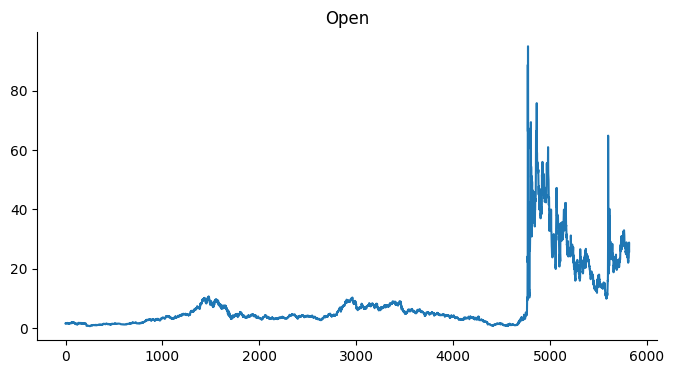

In [ ]:
# @title Open

from matplotlib import pyplot as plt
gme_data['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

**Now extracting Reliance stock data**

In [ ]:
# Fetch Reliance stock data for the last month
reliance = yf.Ticker("RELIANCE.NS")
reliance_data = reliance.history(period="max")

# Display stock data
print("Yahoo Finance - Reliance Stock Data:")
#resetting the index (and retrieving dates as a coloumn, 'Date')
reliance_data.reset_index(inplace=True)

#to preview the first 5 enteries of Tesla's stock data
reliance_data.head()

Yahoo Finance - Reliance Stock Data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1996-01-01 00:00:00+05:30,3.695138,3.714966,3.670805,3.708657,104121369,0.0,0.0
1,1996-01-02 00:00:00+05:30,3.699644,3.717669,3.652779,3.679816,168743308,0.0,0.0
2,1996-01-03 00:00:00+05:30,3.740200,3.910537,3.699644,3.707756,209323879,0.0,0.0
3,1996-01-04 00:00:00+05:30,3.672607,3.684323,3.623939,3.673508,216900264,0.0,0.0
4,1996-01-05 00:00:00+05:30,3.659088,3.659088,3.616730,3.648273,166708467,0.0,0.0


**Extracting revenue table 'GameStop Quarterly Revenue**

In [ ]:
#Specifying the url to GameStop's revenue data
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

#extracting html document
gme_html_data = requests.get(gme_url).text

#creating a beautiful soup object for parsing the document
gme_soup = BeautifulSoup(gme_html_data)

In [ ]:
#Extracting revenue table 'GameStop Quarterly Revenue'
table_list = pd.read_html(gme_html_data,  # specifying the html document
                          match='GameStop Quarterly Revenue',  # specifying the table to look for
                          flavor='bs4')  # specifying the parse engine


#converting the revenue table into a dataframe
gme_revenue = table_list[0]

#renaming the dataframe coloumns appropriately
gme_revenue.rename(columns={'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace=True)

#displaying the dataframe
gme_revenue

<ipython-input-13-936e6ad67df8>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table_list = pd.read_html(gme_html_data,  # specifying the html document


,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


**Extracting revenue table of Reliance's Revenue**

In [ ]:
url = "https://www.moneycontrol.com/financials/relianceindustries/profit-lossVI/RI"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find("table", class_="mctable1")
rows = table.find_all("tr")

profit_loss_data = []
for row in rows:
    columns = row.find_all("td")
    profit_loss_data.append([col.text.strip() for col in columns])

# Convert to DataFrame
df_moneycontrol = pd.DataFrame(profit_loss_data)
print("\nMoneyControl - Profit and Loss Data:")
print(df_moneycontrol.head())

# Set first row as column names and remove it from data
df_moneycontrol.columns = df_moneycontrol.iloc[0]  # Assign first row as column names
df_moneycontrol = df_moneycontrol[1:].reset_index(drop=True)  # Remove first row from data

# Print column names
print(df_moneycontrol.columns)




MoneyControl - Profit and Loss Data:
                                                   0           1           2  \
0  Profit & Loss account of Reliance Industries (...      Mar 24      Mar 23   
1                                                        12 mths     12 mths   
2                                             INCOME                           
3                    Revenue From Operations [Gross]  574,956.00  565,347.00   
4               Less: Excise/Sevice Tax/Other Levies   40,422.00   37,032.00   

            3           4           5 6  
0      Mar 22      Mar 21      Mar 20    
1     12 mths     12 mths     12 mths    
2                                        
3  466,425.00  278,940.00  366,177.00    
4   42,722.00   33,273.00   29,224.00    
Index(['Profit & Loss account of Reliance Industries (in Rs. Cr.)', 'Mar 24',
       'Mar 23', 'Mar 22', 'Mar 21', 'Mar 20', ''],
      dtype='object', name=0)


**Extracting news articles**


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Define the RSS feed URL for Market News
rss_url = "https://economictimes.indiatimes.com/markets/rssfeeds/1977021501.cms"

# Fetch the RSS feed
response = requests.get(rss_url)
soup = BeautifulSoup(response.content, features='xml')

# Extract the latest 5 news article titles
news_articles = [item.title.text for item in soup.find_all('item', limit=5)]


# Create DataFrame
df_news = pd.DataFrame({'News': news_articles})

# Display the results
print("\nEconomic Times - Latest Market News & Sentiments:")
print(df_news)



Economic Times - Latest Market News & Sentiments:
                                                News
0  Jio Financial Services to invest Rs 1,000 cror...
1  Truhome Finance raises 100 million dollar from...
2  Ahead of Market: 10 things that will decide st...
3  Car rental firms Hertz, Avis zoom as tariffs s...
4    UCO Bank fixes QIP price at Rs 34.37 per share 


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from transformers import pipeline

# Define the RSS feed URL for Market News
rss_url = "https://economictimes.indiatimes.com/markets/rssfeeds/1977021501.cms"

# Fetch the RSS feed
response = requests.get(rss_url)
soup = BeautifulSoup(response.content, features='xml')

# Extract the latest 5 news article titles
news_articles = [item.title.text for item in soup.find_all('item', limit=5)]

# Load the FinBERT Sentiment Analysis Pipeline
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

# Perform Sentiment Analysis using FinBERT
bert_results = [sentiment_pipeline(article)[0] for article in news_articles]

# Extract Sentiment Labels and Confidence Scores
bert_sentiments = [result['label'] for result in bert_results]
bert_confidence = [result['score'] for result in bert_results]

# Create DataFrame
df_news = pd.DataFrame({
    'News': news_articles,
    'BERT Sentiment': bert_sentiments,
    'BERT Confidence': bert_confidence
})

# Display the results
print("\nEconomic Times - Latest Market News & BERT Sentiments:")
print(df_news)


Device set to use cpu



Economic Times - Latest Market News & BERT Sentiments:
                                                News BERT Sentiment  \
0  Jio Financial Services to invest Rs 1,000 cror...        neutral   
1  Truhome Finance raises 100 million dollar from...       positive   
2  Ahead of Market: 10 things that will decide st...        neutral   
3  Car rental firms Hertz, Avis zoom as tariffs s...       negative   
4    UCO Bank fixes QIP price at Rs 34.37 per share         neutral   

   BERT Confidence  
0         0.883097  
1         0.852730  
2         0.935943  
3         0.965760  
4         0.906288  


In [ ]:
df_moneycontrol.to_csv("moneycontrol_profit_loss.csv", index=False)
reliance_data.to_csv("yahoo_finance_reliance_stock_data.csv", index=False)
df_news.to_csv("economic_times_news_sentiment.csv", index=False)
gme_data.to_csv("gme_stock_data.csv", index=False)
gme_revenue.to_csv("gme_revenue_data.csv", index=False)
print("\nAll data saved successfully!")



All data saved successfully!


In [ ]:

gme_data = pd.read_csv("gme_stock_data.csv")
reliance_data = pd.read_csv("yahoo_finance_reliance_stock_data.csv")
gme_revenue = pd.read_csv("gme_revenue_data.csv")
df_moneycontrol = pd.read_csv("moneycontrol_profit_loss.csv")
df_news = pd.read_csv("economic_times_news_sentiment.csv")


In [ ]:
print("Columns in gme_data:", gme_data.columns)
print("Columns in reliance_data:", reliance_data.columns)
print("Columns in gme_revenue:", gme_revenue.columns)
print("Columns in df_moneycontrol:", df_moneycontrol.columns)
print("Columns in df_news:", df_news.columns)


Columns in gme_data: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
Columns in reliance_data: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
Columns in gme_revenue: Index(['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1'], dtype='object')
Columns in df_moneycontrol: Index(['Profit & Loss account of Reliance Industries (in Rs. Cr.)', 'Mar 24',
       'Mar 23', 'Mar 22', 'Mar 21', 'Mar 20', 'Unnamed: 6'],
      dtype='object')
Columns in df_news: Index(['News', 'Sentiment Score'], dtype='object')


In [ ]:
def check_missing_values(df, name):
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum())

check_missing_values(gme_data, "GameStop Stock Data")
check_missing_values(reliance_data, "Reliance Stock Data")
check_missing_values(gme_revenue, "GameStop Revenue Data")
check_missing_values(df_moneycontrol, "MoneyControl Profit/Loss Data")
check_missing_values(df_news, "News Sentiment Data")



Missing values in GameStop Stock Data:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Missing values in Reliance Stock Data:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Missing values in GameStop Revenue Data:
GameStop Quarterly Revenue (Millions of US $)      0
GameStop Quarterly Revenue (Millions of US $).1    0
dtype: int64

Missing values in MoneyControl Profit/Loss Data:
Profit & Loss account of Reliance Industries (in Rs. Cr.)     1
Mar 24                                                        8
Mar 23                                                        8
Mar 22                                                        8
Mar 21                                                        8
Mar 20                                                        8
Unnamed: 6 

In [ ]:
df_moneycontrol.fillna(method='ffill', inplace=True)


<ipython-input-20-79c216f6151e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_moneycontrol.fillna(method='ffill', inplace=True)


In [ ]:
import numpy as np
for df in [df_moneycontrol, reliance_data, gme_data, gme_revenue]:
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])
        df[col].fillna(df[col].median(), inplace=True)

df_news['News'] = df_news['News'].str.replace(r'[^\w\s]', '', regex=True).str.strip()


<ipython-input-21-72afe04fe3df>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-21-72afe04fe3df>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Remove duplicate rows if any
gme_data.drop_duplicates(inplace=True)
reliance_data.drop_duplicates(inplace=True)
gme_revenue.drop_duplicates(inplace=True)
df_moneycontrol.drop_duplicates(inplace=True)
df_news.drop_duplicates(inplace=True)


In [ ]:
print("\nFinal Data Overview:")
print(gme_data.info())
print(reliance_data.info())
print(gme_revenue.info())
print(df_moneycontrol.info())
print(df_news.info())



Final Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5818 non-null   object 
 1   Open          5818 non-null   float64
 2   High          5818 non-null   float64
 3   Low           5818 non-null   float64
 4   Close         5818 non-null   float64
 5   Volume        5818 non-null   float64
 6   Dividends     5818 non-null   float64
 7   Stock Splits  5818 non-null   float64
dtypes: float64(7), object(1)
memory usage: 363.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7342 entries, 0 to 7341
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          7342 non-null   object 
 1   Open          7342 non-null   float64
 2   High          7342 non-null   float64
 3   Low           7342 non-null   float64
 4   Close         

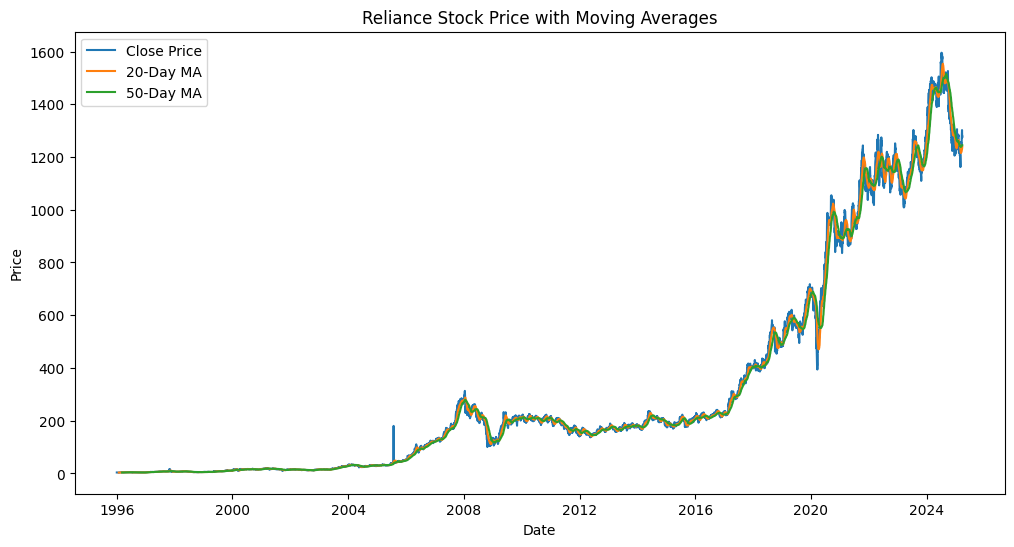

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


reliance = yf.Ticker("RELIANCE.NS")
reliance_data = reliance.history(period="max")

reliance_data['MA20'] = reliance_data['Close'].rolling(window=20).mean()
reliance_data['MA50'] = reliance_data['Close'].rolling(window=50).mean()


plt.figure(figsize=(12, 6))
plt.plot(reliance_data['Close'], label='Close Price')
plt.plot(reliance_data['MA20'], label='20-Day MA')
plt.plot(reliance_data['MA50'], label='50-Day MA')
plt.title('Reliance Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


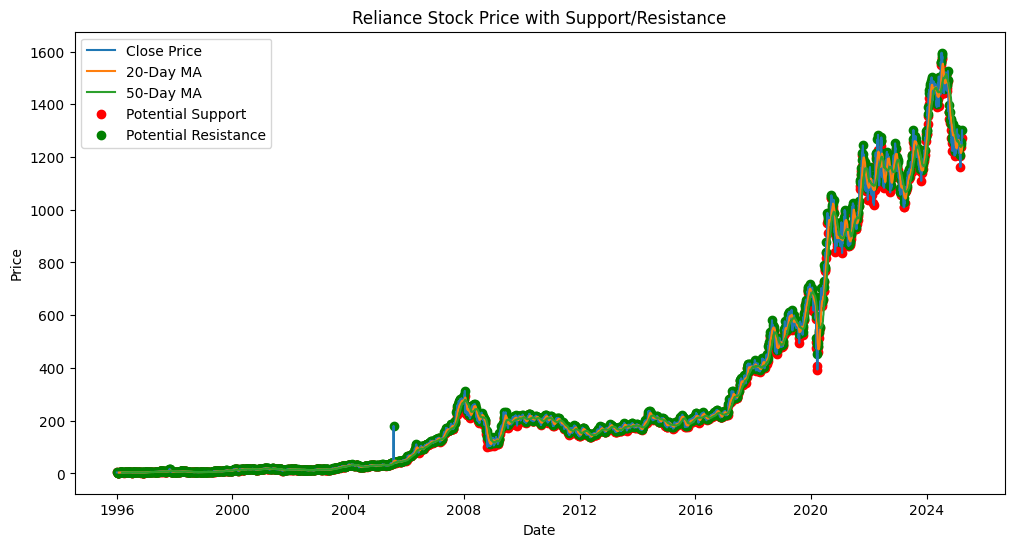

In [ ]:
reliance_data['min'] = reliance_data.Close[(reliance_data.Close.shift(1) > reliance_data.Close) & (reliance_data.Close.shift(-1) > reliance_data.Close)]
reliance_data['max'] = reliance_data.Close[(reliance_data.Close.shift(1) < reliance_data.Close) & (reliance_data.Close.shift(-1) < reliance_data.Close)]

plt.figure(figsize=(12, 6))
plt.plot(reliance_data['Close'], label='Close Price')
plt.plot(reliance_data['MA20'], label='20-Day MA')
plt.plot(reliance_data['MA50'], label='50-Day MA')
plt.scatter(reliance_data.index, reliance_data['min'], color='red', label='Potential Support')
plt.scatter(reliance_data.index, reliance_data['max'], color='green', label='Potential Resistance')
plt.title('Reliance Stock Price with Support/Resistance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

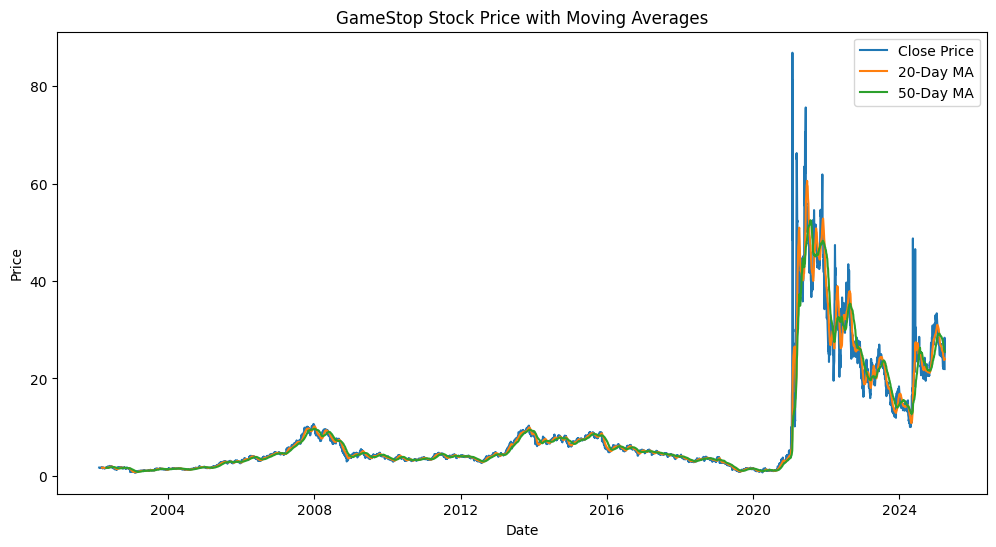

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Calculate moving averages
gme_data['MA20'] = gme_data['Close'].rolling(window=20).mean()
gme_data['MA50'] = gme_data['Close'].rolling(window=50).mean()

# Plot stock price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(gme_data['Close'], label='Close Price')
plt.plot(gme_data['MA20'], label='20-Day MA')
plt.plot(gme_data['MA50'], label='50-Day MA')
plt.title('GameStop Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


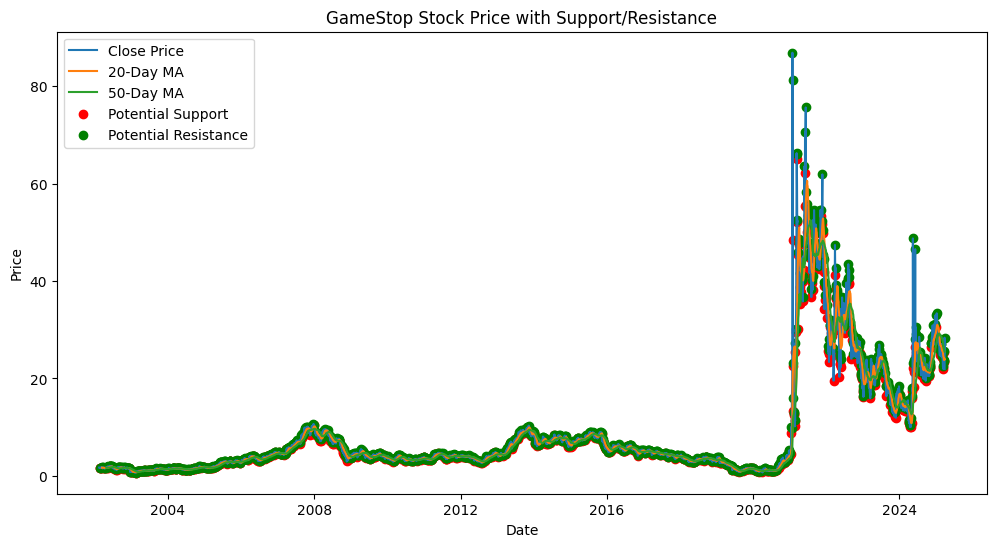

In [ ]:
# Identify potential support and resistance levels
gme_data['min'] = gme_data.Close[(gme_data.Close.shift(1) > gme_data.Close) & (gme_data.Close.shift(-1) > gme_data.Close)]
gme_data['max'] = gme_data.Close[(gme_data.Close.shift(1) < gme_data.Close) & (gme_data.Close.shift(-1) < gme_data.Close)]

# Plot stock price with support/resistance levels
plt.figure(figsize=(12, 6))
plt.plot(gme_data['Close'], label='Close Price')
plt.plot(gme_data['MA20'], label='20-Day MA')
plt.plot(gme_data['MA50'], label='50-Day MA')
plt.scatter(gme_data.index, gme_data['min'], color='red', label='Potential Support')
plt.scatter(gme_data.index, gme_data['max'], color='green', label='Potential Resistance')
plt.title('GameStop Stock Price with Support/Resistance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


RELIANCE.NS Analysis:
  - Trend: Neutral
  - Support Level: 1273.050048828125
  - Resistance Level: 1302.0999755859375


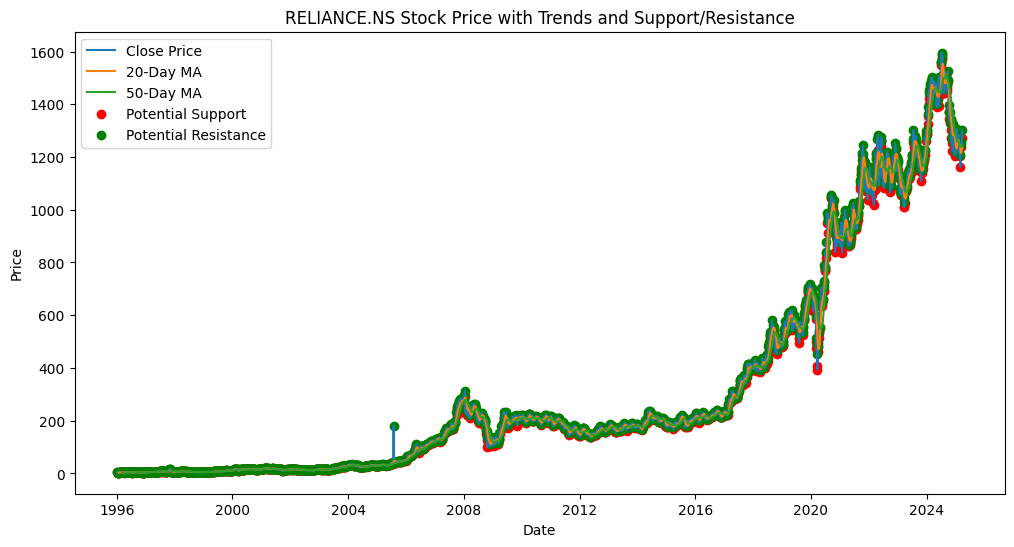


GME Analysis:
  - Trend: Neutral
  - Support Level: 25.399999618530273
  - Resistance Level: 28.360000610351562


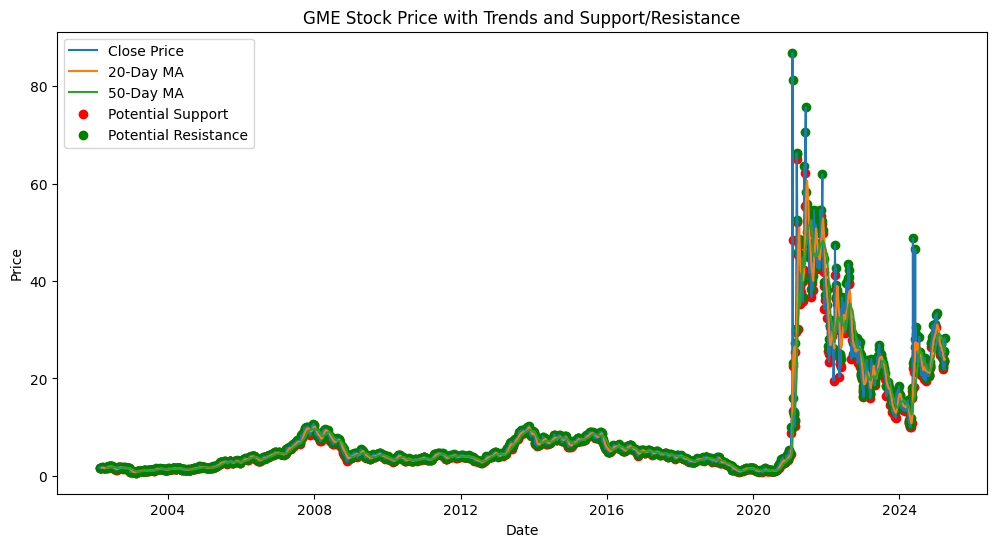

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def analyze_stock(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period="max")

    # Calculate moving averages
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['MA50'] = data['Close'].rolling(window=50).mean()

    # Identify trends
    data['Trend'] = 'Neutral'
    data.loc[(data['MA20'] > data['MA50']) & (data['MA20'].shift(1) < data['MA50'].shift(1)), 'Trend'] = 'Bullish'
    data.loc[(data['MA20'] < data['MA50']) & (data['MA20'].shift(1) > data['MA50'].shift(1)), 'Trend'] = 'Bearish'

    # Identify support/resistance
    data['Support'] = data.Close[(data.Close.shift(1) > data.Close) & (data.Close.shift(-1) > data.Close)]
    data['Resistance'] = data.Close[(data.Close.shift(1) < data.Close) & (data.Close.shift(-1) < data.Close)]

    return data

# Analyze Reliance and GME
reliance_data = analyze_stock("RELIANCE.NS")
gme_data = analyze_stock("GME")

# Function to print and visualize results
def print_and_visualize(data, ticker):
    trend = data['Trend'].iloc[-1]
    support = data['Support'].dropna().iloc[-1] if not data['Support'].dropna().empty else "N/A"
    resistance = data['Resistance'].dropna().iloc[-1] if not data['Resistance'].dropna().empty else "N/A"

    print(f"\n{ticker} Analysis:")
    print(f"  - Trend: {trend}")
    print(f"  - Support Level: {support}")
    print(f"  - Resistance Level: {resistance}")

    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['MA20'], label='20-Day MA')
    plt.plot(data['MA50'], label='50-Day MA')
    plt.scatter(data.index, data['Support'], color='red', label='Potential Support')
    plt.scatter(data.index, data['Resistance'], color='green', label='Potential Resistance')
    plt.title(f"{ticker} Stock Price with Trends and Support/Resistance")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Print and visualize for Reliance and GME
print_and_visualize(reliance_data, "RELIANCE.NS")
print_and_visualize(gme_data, "GME")

In [ ]:
gme_revenue.iloc[:, 1] = gme_revenue.iloc[:, 1].str.replace(',|\$', '', regex=True)  # Using regex for more robust pattern
gme_revenue.columns = ['Date', 'Revenue']  # Setting column names explicitly

#second, removing Nan (not a number) and empty enteries
gme_revenue.dropna(inplace=True)
true_revenues = gme_revenue['Revenue'] != ""
gme_revenue = gme_revenue[true_revenues]

#previewing the dataframe
gme_revenue.head()

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def make_graph(stock_data, revenue_data, stock):
    """This function takes a dataframe with the stock data (must include Date and Close prices),
    a dataframe with the revenue data (must include Date and Revenue amounts), and the name of
    the stock, and plots the historical share price and revenue data on a subplot comprised of
    two scatter plot graphs, one for each."""

    # Assuming 'Date' column is the index after preprocessing
    stock_data_specific = stock_data.reset_index()  # Reset index to make 'Date' a column
    revenue_data_specific = revenue_data  # Assuming revenue_data already has a 'Date' column

    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"),
                        vertical_spacing=.3)

    # Access 'Date' column using bracket notation for stock data
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific['Date'], infer_datetime_format=True),
                             y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    # Access the correct column for revenue data - Assuming it was renamed to 'index'
    # If the actual column name is different, update accordingly
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.index, infer_datetime_format=True),
                             y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def make_graph(stock_data, revenue_data, stock):
    """This function takes a dataframe with the stock data (must include Date and Close prices),
    a dataframe with the revenue data (must include Date and Revenue amounts), and the name of
    the stock, and plots the historical share price and revenue data on a subplot comprised of
    two scatter plot graphs, one for each."""

    # Assuming 'Date' column is the index after preprocessing
    stock_data_specific = stock_data.reset_index()  # Reset index to make 'Date' a column
    revenue_data_specific = revenue_data  # Assuming revenue_data already has a 'Date' column

    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"),
                        vertical_spacing=.3)

    # Access 'Date' column using bracket notation for stock data
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific['Date'], infer_datetime_format=True),
                             y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    # Access the correct column for revenue data - Assuming it was renamed to 'index'
    # If the actual column name is different, update accordingly
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.index, infer_datetime_format=True),
                             y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def make_graph(stock_data, revenue_data, stock):
    """This function takes a dataframe with the stock data (must include Date and Close prices),
    a dataframe with the revenue data (must include Date and Revenue amounts), and the name of
    the stock, and plots the historical share price and revenue data on a subplot comprised of
    two scatter plot graphs, one for each."""

    # Assuming 'Date' column is the index after preprocessing
    stock_data_specific = stock_data.reset_index()  # Reset index to make 'Date' a column
    revenue_data_specific = revenue_data  # Assuming revenue_data already has a 'Date' column

    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"),
                        vertical_spacing=.3)

    # Access 'Date' column using bracket notation for stock data
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific['Date'], infer_datetime_format=True),
                             y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    # Access the correct column for revenue data - Assuming it was renamed to 'index'
    # If the actual column name is different, update accordingly
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.index, infer_datetime_format=True),
                             y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data')

<ipython-input-32-2fb63a5f3e14>:19: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

<ipython-input-32-2fb63a5f3e14>:23: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [ ]:
revenue_col_index = 1
original_columns = df_moneycontrol.columns

new_columns = list(original_columns)
new_columns[revenue_col_index] = 'Revenue'

df_moneycontrol.columns = new_columns
# Convert the 'Revenue' column to string type before using .str methods
df_moneycontrol['Revenue'] = df_moneycontrol['Revenue'].astype(str).str.replace(',|\$', '', regex=True)
df_moneycontrol.dropna(inplace=True)
true_revenues = df_moneycontrol['Revenue'] != ""
df_moneycontrol = df_moneycontrol[true_revenues]

df_moneycontrol.head()

,Profit & Loss account of Reliance Industries (in Rs. Cr.),Revenue,Mar 23,Mar 22,Mar 21,Mar 20,Unnamed: 6


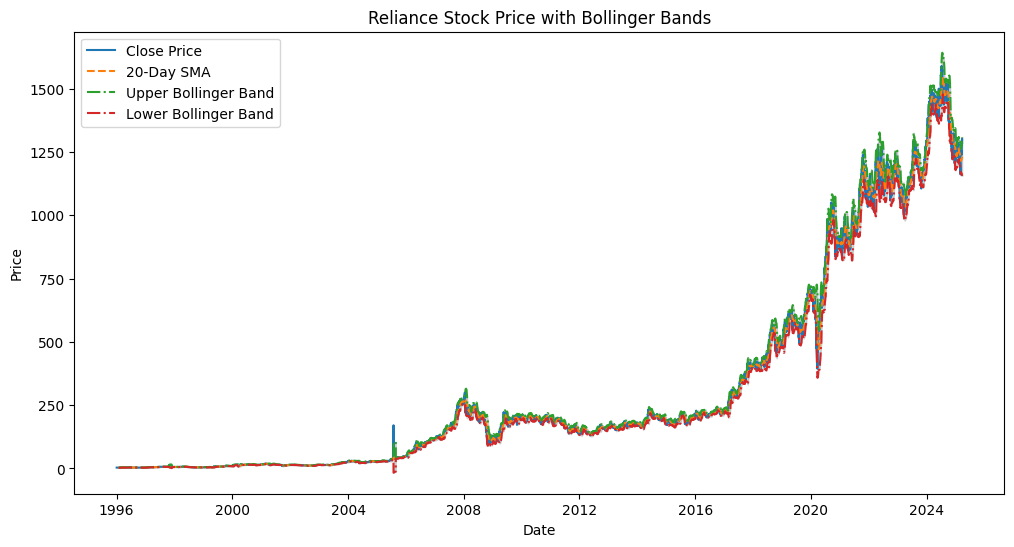

In [ ]:
# Calculate Bollinger Bands (20-day SMA & Standard Deviation)
reliance_data['SMA20'] = reliance_data['Close'].rolling(window=20).mean()
reliance_data['Upper_Band'] = reliance_data['SMA20'] + (2 * reliance_data['Close'].rolling(window=20).std())
reliance_data['Lower_Band'] = reliance_data['SMA20'] - (2 * reliance_data['Close'].rolling(window=20).std())

# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(reliance_data['Close'], label='Close Price')
plt.plot(reliance_data['SMA20'], label='20-Day SMA', linestyle="--")
plt.plot(reliance_data['Upper_Band'], label='Upper Bollinger Band', linestyle="-.")
plt.plot(reliance_data['Lower_Band'], label='Lower Bollinger Band', linestyle="-.")
plt.fill_between(reliance_data.index, reliance_data['Lower_Band'], reliance_data['Upper_Band'], color='gray', alpha=0.3)
plt.title('Reliance Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


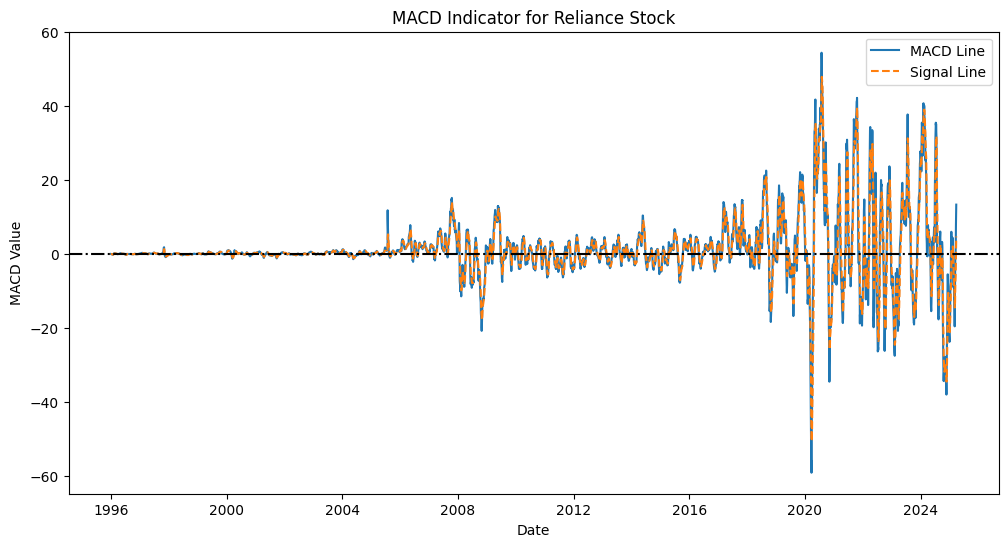

In [ ]:
# Calculate MACD (12-day EMA, 26-day EMA, and 9-day Signal Line)
reliance_data['EMA12'] = reliance_data['Close'].ewm(span=12, adjust=False).mean()
reliance_data['EMA26'] = reliance_data['Close'].ewm(span=26, adjust=False).mean()
reliance_data['MACD'] = reliance_data['EMA12'] - reliance_data['EMA26']
reliance_data['Signal'] = reliance_data['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(reliance_data['MACD'], label='MACD Line')
plt.plot(reliance_data['Signal'], label='Signal Line', linestyle="--")
plt.axhline(y=0, color='black', linestyle='-.')  # Zero Line
plt.title('MACD Indicator for Reliance Stock')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()


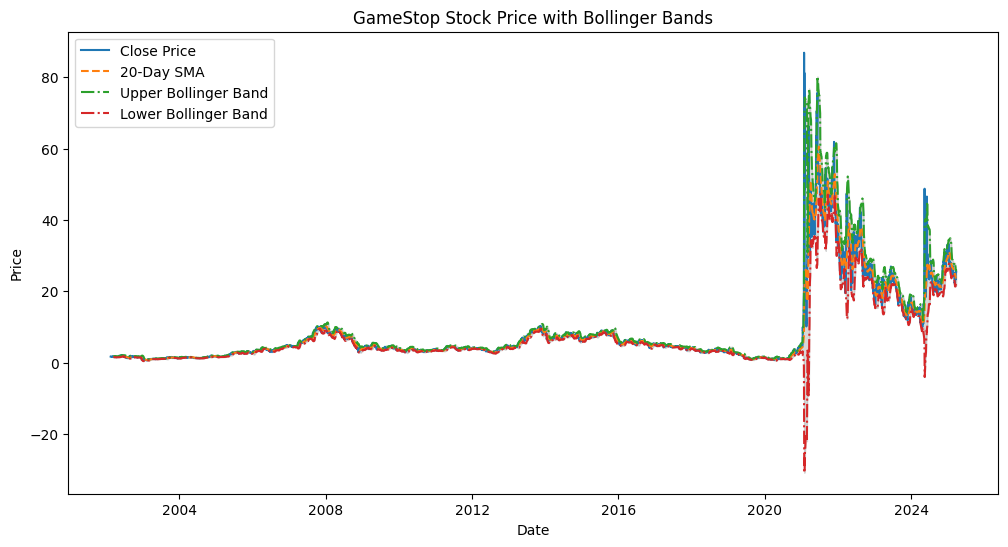

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Calculate Bollinger Bands (20-day SMA & Standard Deviation)
gme_data['SMA20'] = gme_data['Close'].rolling(window=20).mean()
gme_data['Upper_Band'] = gme_data['SMA20'] + (2 * gme_data['Close'].rolling(window=20).std())
gme_data['Lower_Band'] = gme_data['SMA20'] - (2 * gme_data['Close'].rolling(window=20).std())

# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(gme_data['Close'], label='Close Price')
plt.plot(gme_data['SMA20'], label='20-Day SMA', linestyle="--")
plt.plot(gme_data['Upper_Band'], label='Upper Bollinger Band', linestyle="-.")
plt.plot(gme_data['Lower_Band'], label='Lower Bollinger Band', linestyle="-.")
plt.fill_between(gme_data.index, gme_data['Lower_Band'], gme_data['Upper_Band'], color='gray', alpha=0.3)
plt.title('GameStop Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


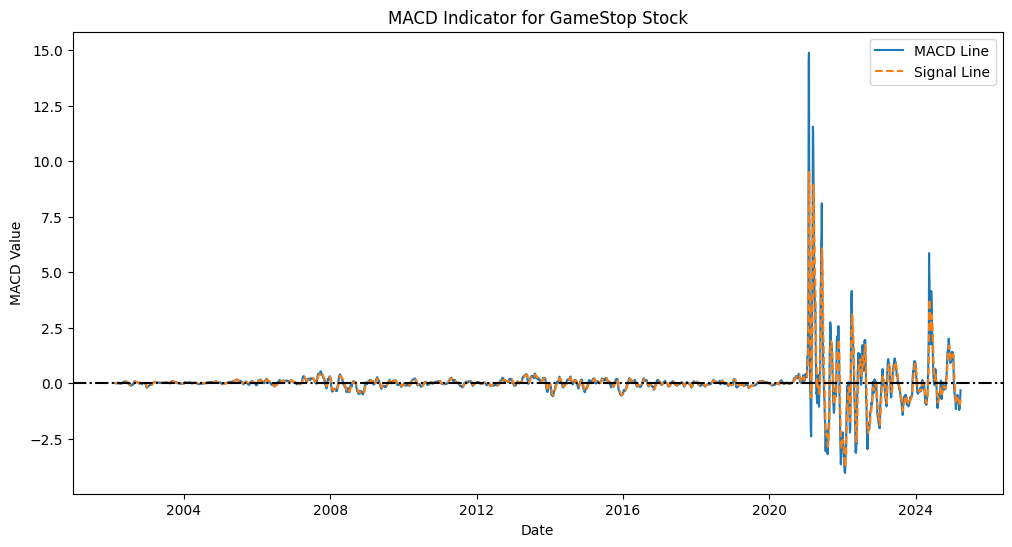

In [ ]:
# Calculate MACD (12-day EMA, 26-day EMA, and 9-day Signal Line)
gme_data['EMA12'] = gme_data['Close'].ewm(span=12, adjust=False).mean()
gme_data['EMA26'] = gme_data['Close'].ewm(span=26, adjust=False).mean()
gme_data['MACD'] = gme_data['EMA12'] - gme_data['EMA26']
gme_data['Signal'] = gme_data['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(gme_data['MACD'], label='MACD Line')
plt.plot(gme_data['Signal'], label='Signal Line', linestyle="--")
plt.axhline(y=0, color='black', linestyle='-.')  # Zero Line
plt.title('MACD Indicator for GameStop Stock')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()


In [ ]:
# Define key financial events (Date: Event)
financial_events = {
    "2020-04-22": "Facebook Invests in Jio",
    "2020-07-15": "Google Invests in Jio",
    "2021-10-01": "O2C Business Spin-off Plans",
    "2022-06-24": "Reliance AGM 2022 Announcements",
    "2023-08-28": "Reliance AGM 2023 - Jio AirFiber",
}


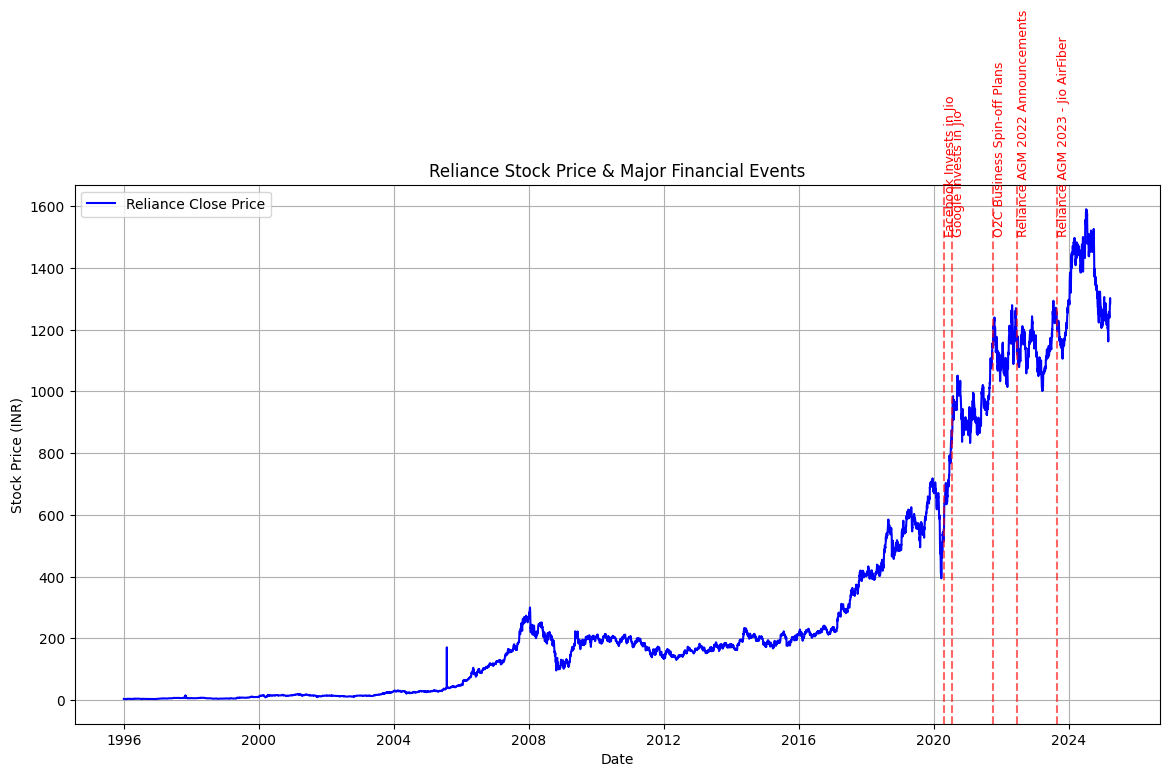

In [ ]:
import matplotlib.pyplot as plt
import datetime  # Import datetime

plt.figure(figsize=(14, 7))
# Access 'Date' from the index and convert to datetime objects for plotting
plt.plot(reliance_data.index.to_pydatetime(), reliance_data["Close"], label="Reliance Close Price", color="blue")

# Mark financial events with vertical lines and annotations
for date, event in financial_events.items():
    event_date = datetime.datetime.strptime(date, "%Y-%m-%d")  # Corrected usage of datetime
    plt.axvline(x=event_date, color="red", linestyle="--", alpha=0.6)
    plt.text(event_date, reliance_data["Close"].max() * 0.95, event, rotation=90, fontsize=9, color="red")

plt.title("Reliance Stock Price & Major Financial Events")
plt.xlabel("Date")
plt.ylabel("Stock Price (INR)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Define key financial events (Date: Event)
financial_events = {
    "2021-01-27": "GME Short Squeeze",
    "2021-03-25": "Q4 2020 Earnings Report",
    "2022-06-09": "Stock Split Announcement",
    "2023-08-30": "Q2 2023 Earnings Report",
    "2023-10-10": "Market Decline (Fed Rate Hike)",
}

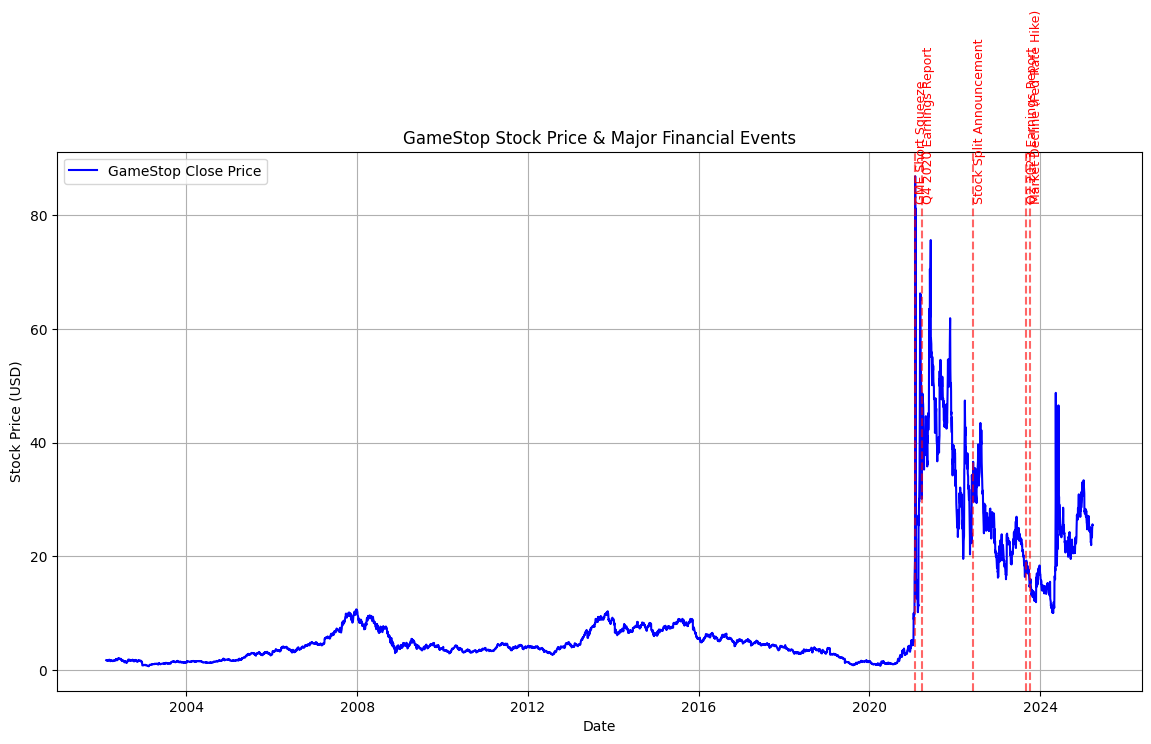

In [ ]:
plt.figure(figsize=(14, 7))
# Access 'Date' from the index and convert to datetime objects for plotting
plt.plot(gme_data.index.to_pydatetime(), gme_data["Close"], label="GameStop Close Price", color="blue")

# Plot financial events
for date, event in financial_events.items():
    event_date = datetime.datetime.strptime(date, "%Y-%m-%d")
    plt.axvline(x=event_date, color="red", linestyle="--", alpha=0.6)
    plt.text(event_date, gme_data["Close"].max() * 0.95, event, rotation=90, fontsize=9, color="red")

plt.title("GameStop Stock Price & Major Financial Events")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid()
plt.show()



In [ ]:
!pip install tensorflow

In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Function to prepare data and create Random Forest model for GME revenue
def create_rf_model_revenue(data, feature_column, look_back=60):  # look_back is not used for RF, kept for consistency
    # Check if 'Date' is in the columns and rename if necessary
    if 'Date' not in data.columns and data.index.name == 'Date':
        data = data.reset_index()
    elif 'Date' not in data.columns and 'index' in data.columns:
        data.rename(columns={'index': 'Date'}, inplace=True)

    # Convert 'Date' to datetime objects (if not already) and set as index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Select the feature column for prediction
    dataset = data[[feature_column]].values.astype('float32')

    # Normalize data using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # Split data into training and testing sets (e.g., 80% train, 20% test)
    train_size = int(len(dataset) * 0.8)
    train_data, test_data = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

    # Extract features (X) and target (Y) for training and testing
    X_train, Y_train = train_data[:, 0], train_data[:, 0] # revenue as both feature and target for simple RF model.
    X_test, Y_test = test_data[:, 0], test_data[:, 0]

    # Create and train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
    model.fit(X_train.reshape(-1,1), Y_train)  # Reshape to meet sklearn input expectations

    return model, scaler, X_test, Y_test

In [ ]:
revenue_model, revenue_scaler, X_test_revenue, Y_test_revenue = create_rf_model_revenue(gme_revenue, 'Revenue') # Reshape for prediction
revenue_predictions = revenue_model.predict(X_test_revenue.reshape(-1,1))  # Reshape for prediction
revenue_predictions = revenue_scaler.inverse_transform(revenue_predictions.reshape(-1, 1))

# Continue with evaluation and further analysis

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  # Import necessary metrics
import matplotlib.pyplot as plt
import numpy as np
def evaluate_and_visualize(model, scaler, X_test, Y_test, title):
    # Make predictions
    predictions = model.predict(X_test.reshape(-1, 1))

    # Invert scaling to get actual values
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    actual_values = scaler.inverse_transform(Y_test.reshape(-1, 1))

    # Calculate evaluation metrics
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, predictions)

    print(f"\n{title} Model Evaluation:")
    print(f"  - Mean Squared Error (MSE): {mse:.4f}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  - R-squared (R2): {r2:.4f}")

    # Visualize predictions vs. actual values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values, label="Actual Values", color="blue")
    plt.plot(predictions, label="Predictions", color="red")
    plt.title(f"{title} Predictions vs. Actual Values")
    plt.xlabel("Time")
    plt.ylabel(title)  # Set y-axis label to the title
    plt.legend()
    plt.show()




Revenue Model Evaluation:
  - Mean Squared Error (MSE): 116965.9335
  - Root Mean Squared Error (RMSE): 342.0028
  - R-squared (R2): 0.7594


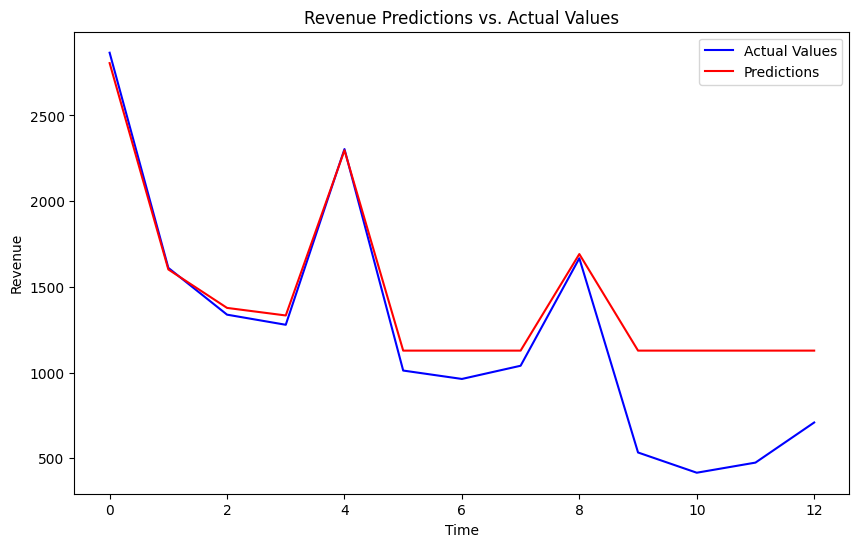

In [ ]:
# Evaluate and visualize revenue model
evaluate_and_visualize(revenue_model, revenue_scaler, X_test_revenue, Y_test_revenue, "Revenue")

In [ ]:
def predict_revenue(model, scaler, date_input):
    """Predicts the revenue for a given date using the trained model."""

    # Convert date input to datetime object
    date_input = pd.to_datetime(date_input)

    # Assume gme_revenue is your original DataFrame (make sure it has 'Date' as a column)
    gme_revenue.reset_index(inplace=True)  # This line sets 'Date' as column if it is index.
    gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date']) # This line will ensure 'Date' column is in datetime format

    # Get the last available date in your dataset for prediction if input date is beyond
    last_available_date = gme_revenue['Date'].max()
    if date_input > last_available_date:
        date_input = last_available_date

    # Get closest data point from the dataset if input date is not exact
    closest_date = gme_revenue['Date'].loc[gme_revenue['Date'] <= date_input].max()
    closest_data_point = gme_revenue.loc[gme_revenue['Date'] == closest_date, 'Revenue'].values[0]

    # Reshape and scale the data point
    input_data = scaler.transform([[closest_data_point]])

    # Make prediction and inverse transform to get actual revenue
    predicted_revenue = model.predict(input_data)[0]  # Assuming revenue_model is an RF model
    predicted_revenue = scaler.inverse_transform([[predicted_revenue]])[0][0]

    return predicted_revenue

In [ ]:
user_input_date = input("Enter the date (YYYY-MM-DD) for revenue prediction: ")
predicted_revenue = predict_revenue(revenue_model, revenue_scaler, user_input_date)
print(f"Predicted Revenue: ${predicted_revenue:.2f}")

Enter the date (YYYY-MM-DD) for revenue prediction: 2025-05-12
Predicted Revenue: $1128.27


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf # Import yfinance

# Fetch GME data using yfinance
gme = yf.Ticker("GME")
df = gme.history(period="max")

# Check the data structure
print(df.head())

# Select 'Open' price as the main feature
scaler = MinMaxScaler(feature_range=(0, 1))
df["Open"] = scaler.fit_transform(df[["Open"]])

# Create dataset with look-back (past 60 days)
look_back = 60
X, Y = [], []
for i in range(look_back, len(df)):
    X.append(df["Open"].iloc[i-look_back:i].values)  # Past 60 days Open prices
    Y.append(df["Open"].iloc[i])  # Next day's Open price

X, Y = np.array(X), np.array(Y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Build the LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 2.4446e-04 - val_loss: 0.0046
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 1.7646e-05 - val_loss: 0.0049
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.5266e-05 - val_loss: 0.0043
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.5041e-05 - val_loss: 0.0042
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.4281e-05 - val_loss: 0.0041
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.2930e-05 - val_loss: 0.0039
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 1.3199e-05 - val_loss: 0.0038
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 1.2151e-05 - val_loss: 0.0037
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 1.1204e-05 - val_loss: 0.0036
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 1.2724e-05 - val_loss: 0.0035
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.0697e-05 - val_loss: 0.0034
Epo

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


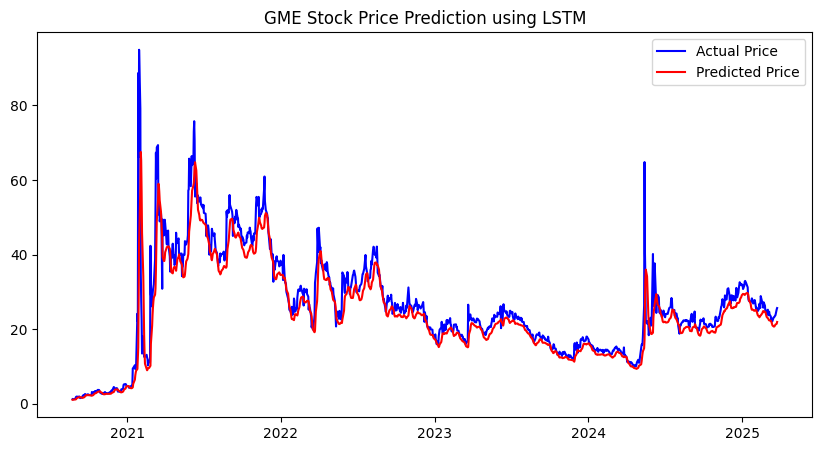

In [ ]:
# Predict on test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to original values
actual_prices = scaler.inverse_transform(Y_test.reshape(-1,1))

# Visualize Predictions vs Actual Prices
plt.figure(figsize=(10,5))
plt.plot(df.index[-len(Y_test):], actual_prices, label="Actual Price", color='blue')
plt.plot(df.index[-len(Y_test):], predictions, label="Predicted Price", color='red')
plt.legend()
plt.title("GME Stock Price Prediction using LSTM")
plt.show()

In [ ]:
import numpy as np

def user_test_model(model, scaler):
    """
    Allows the user to input a stock price and get a predicted price.
    """
    try:
        # Ask for stock price input
        input_price = input("Enter the stock's opening price: ").strip()

        # Ensure valid input
        if not input_price.replace(".", "", 1).isdigit():
            raise ValueError("Invalid input! Please enter a numerical value for stock price.")

        input_price = float(input_price)

        # Normalize the input price (ensure it's a 2D array)
        input_price_scaled = scaler.transform(np.array([[input_price]]))  # Shape: (1, 1)

        # Ensure the model receives a correctly shaped input
        input_price_scaled = np.expand_dims(input_price_scaled, axis=0)  # Shape: (1, 1, 1)

        # Predict the future stock price
        predicted_price_scaled = model.predict(input_price_scaled)  # Ensure model gets correct shape

        # Convert back to actual price
        predicted_price = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))

        print(f"Predicted Stock Price: {predicted_price[0][0]:.2f}")

    except ValueError as e:
        print(e)  # Print specific error message


In [ ]:
# Call the function for single user input
user_test_model(model, scaler)

Enter the stock's opening price: 42.88


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Predicted Stock Price: 11.23


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import datetime
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Convert Date to datetime format and create Date_Ordinal
gme_data.reset_index(inplace=True)
# Convert Date to datetime format
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data['Date_Ordinal'] = gme_data['Date'].map(datetime.toordinal)  # Convert Date to ordinal format

gme_data = gme_data[['Date_Ordinal', 'Open', 'Close']]  # Selecting relevant features

# Normalize Data
scaler = MinMaxScaler(feature_range=(0,1))
gme_data_scaled = scaler.fit_transform(gme_data)

# Prepare Data for LSTM
look_back = 60  # Use the past 60 days to predict the next day's Close price
X, Y = [], []
for i in range(len(gme_data_scaled) - look_back):
    X.append(gme_data_scaled[i:i+look_back, :2])  # Using Date_Ordinal and Open Price as input
    Y.append(gme_data_scaled[i+look_back, 2])  # Close Price as target

X, Y = np.array(X), np.array(Y)

# Split into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 2)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 9.3092e-04 - val_loss: 0.0077
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 7.1128e-05 - val_loss: 0.0058
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 4.4448e-05 - val_loss: 0.0056
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 4.9616e-05 - val_loss: 0.0056
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 3.3155e-05 - val_loss: 0.0055
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 2.9022e-05 - val_loss: 0.0054
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 2.7305e-05 - val_loss: 0.0055
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 3.0336e-05 - val_loss: 0.0052
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 2.6686e-05 - val_loss: 0.0056
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.6612e-05 - val_loss: 0.0051
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 2.5637e-05 - val_loss: 0.0053
Epoch

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


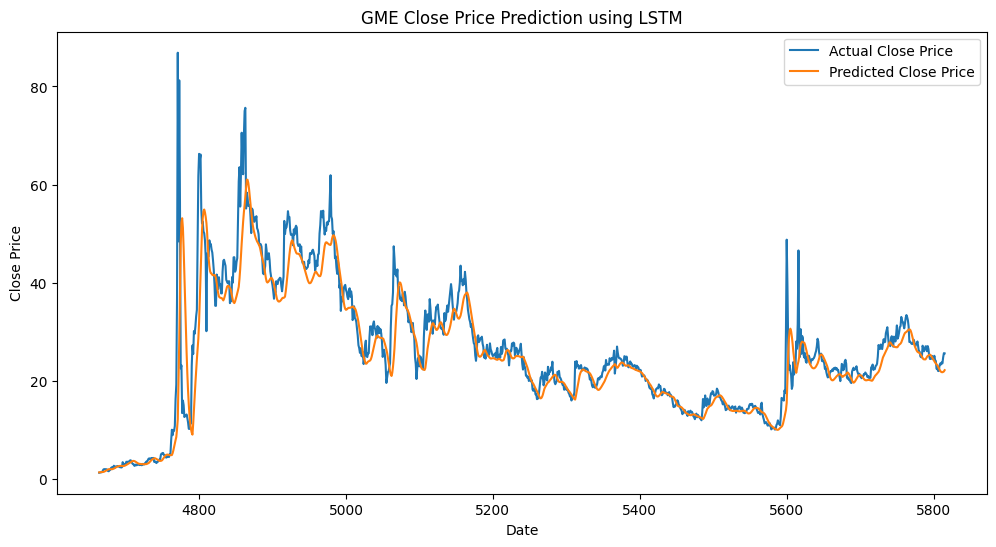

In [ ]:
original_dates = gme_data.index
# Predict on test data
predicted_scaled = model.predict(X_test)
predicted = np.zeros((len(predicted_scaled), 3))  # Placeholder for inverse transformation
predicted[:, 2] = predicted_scaled[:, 0]
predicted_actual = scaler.inverse_transform(predicted)[:, 2]

# Plot actual vs predicted close prices using original_dates
plt.figure(figsize=(12, 6))
sns.lineplot(x=original_dates[train_size+look_back:], y=gme_data['Close'][train_size+look_back:], label="Actual Close Price") # Use original_dates here
sns.lineplot(x=original_dates[train_size+look_back:], y=predicted_actual, label="Predicted Close Price") # Use original_dates here
plt.title("GME Close Price Prediction using LSTM")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [ ]:
def predict_close_price(date_input, open_price):
    date_ordinal = datetime.strptime(date_input, '%Y-%m-%d').toordinal()
    input_data = np.array([[date_ordinal, open_price]])  # Using only Date_Ordinal and Open Price

    # Create a temporary DataFrame with the same columns as the original data
    temp_df = pd.DataFrame(input_data, columns=['Date_Ordinal', 'Open'])

    # Add a dummy 'Close' column with a default value (e.g., 0)
    temp_df['Close'] = 0

    # Now transform using the scaler
    input_scaled = scaler.transform(temp_df)

    # Extract the scaled values for Date_Ordinal and Open Price
    input_scaled = input_scaled[:, :2]

    # Reshape for LSTM input with look_back and 2 features (Date_Ordinal, Open)
    input_reshaped = np.reshape(input_scaled, (1, 1, 2))  # Reshaped for LSTM input with 2 features

    predicted_scaled = model.predict(input_reshaped)

    # Create a dummy array for inverse transformation (to match original data shape)
    dummy_array = np.zeros((1, 3))
    dummy_array[0, :2] = input_scaled[0]  # Fill with date_ordinal and open_price
    dummy_array[0, 2] = predicted_scaled[0][0]  # Fill with the predicted close price

    predicted_price = scaler.inverse_transform(dummy_array)[0][2]
    print(f"Predicted Close Price for {date_input} with Open Price {open_price}: {predicted_price:.2f}")


# Example Usage
predict_close_price("2025-03-20", 23.50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Close Price for 2025-03-20 with Open Price 23.5: 5.97


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


# Define the stock ticker (e.g., Reliance Industries)
ticker = "RELIANCE.NS"

# Fetch financials (profit & loss statement)
stock = yf.Ticker(ticker)
financials = stock.financials.T  # Transpose to make years columns

# Extract revenue data
df = financials[["Total Revenue"]].reset_index()
df.columns = ["Year", "Revenue"]

# Convert year to integer
df["Year"] = df["Year"].dt.year

# Print extracted data
print(df)


   Year          Revenue
0  2024  9010640000000.0
1  2023  8778350000000.0
2  2022  6959630000000.0
3  2021  4669240000000.0
4  2020              NaN


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Drop missing values
df = df.dropna().reset_index(drop=True)

# Convert Revenue to numerical values and scale to billions (Cr.)
df["Revenue"] = df["Revenue"].astype(float)/1e9 # Convert from ₹ to ₹ Cr.

# Sort by Year
df = df.sort_values("Year")

# Prepare features (X) and target (y)
X = df["Year"].values.reshape(-1, 1)
y = df["Revenue"].values

# Normalize revenue values
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.3, random_state=42)


In [ ]:
print(df.head())  # Check if revenue data is valid
print(X_train.shape, X_test.shape)  # Ensure training data is not empty
print(y_train[:5])  # See if target values are reasonable


   Year  Revenue
3  2021  4669.24
2  2022  6959.63
1  2023  8778.35
0  2024  9010.64
(2, 1) (2, 1)
[[0.        ]
 [0.94649422]]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Predict on test data
y_pred_scaled = rf_model.predict(X_test)

# Convert predictions back to original scale
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Print sample predictions
for year, actual, predicted in zip(X_test.flatten(), scaler.inverse_transform(y_test.reshape(-1, 1)).flatten(), y_pred.flatten()):
    print(f"Year: {year}, Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Evaluate model performance
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), y_pred)
rmse = np.sqrt(mse)

print("\nReliance Revenue Model Evaluation:")
print(f"  - Mean Squared Error (MSE): {mse:.4f}")
print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f}")

Year: 2022, Actual: 6959.63, Predicted: 5573.24
Year: 2024, Actual: 9010.64, Predicted: 7709.98

Reliance Revenue Model Evaluation:
  - Mean Squared Error (MSE): 1806889.1901
  - Root Mean Squared Error (RMSE): 1344.2058


In [ ]:
# Predict revenue for next year (2025)
next_year = np.array([[df["Year"].max() + 1]])
predicted_revenue_scaled = rf_model.predict(next_year)
predicted_revenue = scaler.inverse_transform(predicted_revenue_scaled.reshape(-1, 1))

print(f"🔮 Predicted Revenue for {next_year[0][0]}: {predicted_revenue[0][0]:.2f} Cr.")


🔮 Predicted Revenue for 2025: 7709.98 Cr.



Reliance Revenue Model Evaluation:
  - Mean Squared Error (MSE): 1806889.1901
  - Root Mean Squared Error (RMSE): 1344.2058


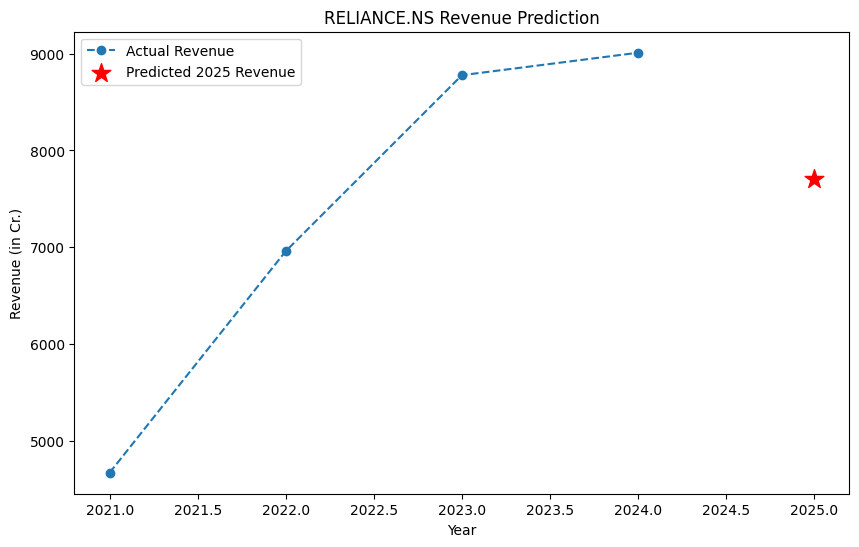

In [ ]:
import matplotlib.pyplot as plt

# Sort data for plotting
df_sorted = df.sort_values("Year")

# Evaluate model performance
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), y_pred)
rmse = np.sqrt(mse)

print("\nReliance Revenue Model Evaluation:")
print(f"  - Mean Squared Error (MSE): {mse:.4f}")
print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f}")

# Visualization: Actual vs Predicted Revenue
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Revenue"], marker="o", linestyle="--", label="Actual Revenue")
plt.scatter(next_year, predicted_revenue, color="red", marker="*", s=200, label=f"Predicted {next_year[0][0]} Revenue")

plt.xlabel("Year")
plt.ylabel("Revenue (in Cr.)")
plt.title(f"{ticker} Revenue Prediction")
plt.legend()
plt.show()


In [ ]:
# Function to predict revenue for a given year
def predict_revenue(model, scaler, year_input):
    """Predicts revenue for a given year."""
    year_input = np.array([[year_input]])
    predicted_revenue_scaled = model.predict(year_input)
    predicted_revenue = scaler.inverse_transform(predicted_revenue_scaled.reshape(-1, 1))
    return predicted_revenue[0][0]

# Get user input for revenue prediction
user_input_year = int(input("\nEnter the year for revenue prediction: "))
predicted_revenue_user = predict_revenue(rf_model, scaler, user_input_year)
print(f"\nPredicted Revenue for {user_input_year}: {predicted_revenue_user:.2f} Cr.")


Enter the year for revenue prediction: 2027

Predicted Revenue for 2027: 7709.98 Cr.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf  # Import yfinance

# Fetch Reliance data using yfinance
reliance = yf.Ticker("RELIANCE.NS")
df = reliance.history(period="max")

# Check the data structure
print(df.head())

# Select 'Open' price as the main feature
scaler = MinMaxScaler(feature_range=(0, 1))
df["Open"] = scaler.fit_transform(df[["Open"]])

# Create dataset with look-back (past 60 days)
look_back = 60
X, Y = [], []
for i in range(look_back, len(df)):
    X.append(df["Open"].iloc[i - look_back : i].values)  # Past 60 days Open prices
    Y.append(df["Open"].iloc[i])  # Next day's Open price

X, Y = np.array(X), np.array(Y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Build the LSTM Model
model = Sequential(
    [
        LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=25),
        Dense(units=1),
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))


                               Open      High       Low     Close     Volume  \
Date                                                                           
1996-01-01 00:00:00+05:30  3.429161  3.447562  3.406579  3.441707  104121369   
1996-01-02 00:00:00+05:30  3.433343  3.450070  3.389851  3.414942  168743308   
1996-01-03 00:00:00+05:30  3.470980  3.629056  3.433343  3.440871  209323879   
1996-01-04 00:00:00+05:30  3.408251  3.419124  3.363086  3.409087  216900264   
1996-01-05 00:00:00+05:30  3.395706  3.395706  3.356396  3.385669  166708467   

                           Dividends  Stock Splits  
Date                                                
1996-01-01 00:00:00+05:30        0.0           0.0  
1996-01-02 00:00:00+05:30        0.0           0.0  
1996-01-03 00:00:00+05:30        0.0           0.0  
1996-01-04 00:00:00+05:30        0.0           0.0  
1996-01-05 00:00:00+05:30        0.0           0.0  
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



182/182 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 9.4768e-04 - val_loss: 8.7505e-04
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 1.1535e-04 - val_loss: 7.0804e-04
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 1.1944e-04 - val_loss: 0.0010
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 7.5255e-05 - val_loss: 8.4347e-04
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 8.2088e-05 - val_loss: 9.7788e-04
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 9.8135e-05 - val_loss: 5.5917e-04
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 7.6622e-05 - val_loss: 0.0015
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 9.6054e-05 - val_loss: 0.0013
Epoch 9/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 8.9661e-05 - val_loss: 3.7512e-04
Epoch 10/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 7.5275e-05 - val_loss: 5.5214e-04
Epoch 11/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


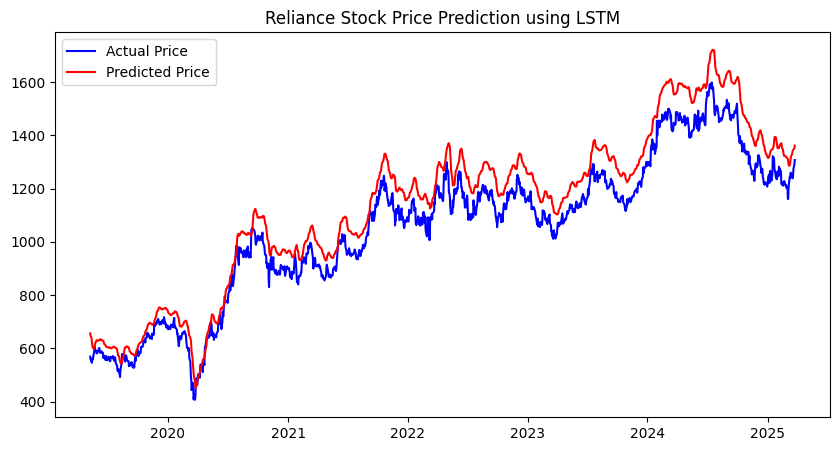

In [ ]:
# Predict on test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to original values
actual_prices = scaler.inverse_transform(Y_test.reshape(-1,1))

# Visualize Predictions vs Actual Prices
plt.figure(figsize=(10,5))
plt.plot(df.index[-len(Y_test):], actual_prices, label="Actual Price", color='blue')
plt.plot(df.index[-len(Y_test):], predictions, label="Predicted Price", color='red')
plt.legend()
plt.title("Reliance Stock Price Prediction using LSTM")
plt.show()


In [ ]:
import numpy as np

def user_test_model(model, scaler):
    """
    Allows the user to input a stock price and get a predicted price.
    """
    try:
        # Ask for stock price input
        input_price = input("Enter Reliance stock's opening price: ").strip()

        # Ensure valid input
        if not input_price.replace(".", "", 1).isdigit():
            raise ValueError("Invalid input! Please enter a numerical value for stock price.")

        input_price = float(input_price)

        # Normalize the input price (ensure it's a 2D array)
        input_price_scaled = scaler.transform(np.array([[input_price]]))  # Shape: (1, 1)

        # Ensure the model receives a correctly shaped input
        input_price_scaled = np.expand_dims(input_price_scaled, axis=0)  # Shape: (1, 1, 1)

        # Predict the future stock price
        predicted_price_scaled = model.predict(input_price_scaled)  # Ensure model gets correct shape

        # Convert back to actual price
        predicted_price = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))

        print(f"Predicted Reliance Stock Price: {predicted_price[0][0]:.2f}")

    except ValueError as e:
        print(e)  # Print specific error message


In [ ]:
# Call the function for single user input
user_test_model(model, scaler)

Enter Reliance stock's opening price: 42.88


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Predicted Reliance Stock Price: 124.90


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import datetime
import yfinance as yf  # Ensure yfinance is imported

# Fetch Reliance data using yfinance
reliance = yf.Ticker("RELIANCE.NS")  # Reliance Industries NSE ticker
reliance_data = reliance.history(period="max")

# Convert Date to datetime format and create Date_Ordinal
reliance_data.reset_index(inplace=True)
reliance_data['Date'] = pd.to_datetime(reliance_data['Date'])
reliance_data['Date_Ordinal'] = reliance_data['Date'].map(datetime.toordinal)  # Convert Date to ordinal format

reliance_data = reliance_data[['Date_Ordinal', 'Open', 'Close']]  # Selecting relevant features

# Normalize Data
scaler = MinMaxScaler(feature_range=(0,1))
reliance_data_scaled = scaler.fit_transform(reliance_data)

# Prepare Data for LSTM
look_back = 60  # Use the past 60 days to predict the next day's Close price
X, Y = [], []
for i in range(len(reliance_data_scaled) - look_back):
    X.append(reliance_data_scaled[i:i+look_back, :2])  # Using Date_Ordinal and Open Price as input
    Y.append(reliance_data_scaled[i+look_back, 2])  # Close Price as target

X, Y = np.array(X), np.array(Y)

# Split into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 2)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 1.7263e-04 - val_loss: 0.0012
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 1.2905e-04 - val_loss: 0.0020
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 1.2425e-04 - val_loss: 7.3711e-04
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 1.0284e-04 - val_loss: 7.3765e-04
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 1.0487e-04 - val_loss: 0.0013
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 1.0228e-04 - val_loss: 0.0018
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 1.0108e-04 - val_loss: 0.0011
Epoch 9/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 8.6683e-05 - val_loss: 0.0018
Epoch 10/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - loss: 9.0033e-05 - val_loss: 0.0016
Epoch 11/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 8.3764e-05 - val_loss: 6.

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step


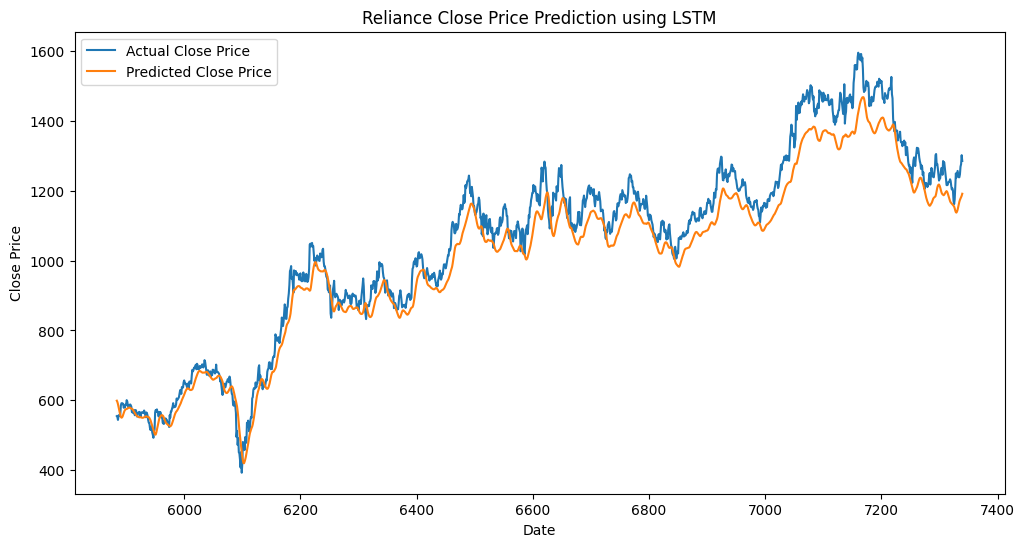

In [ ]:
original_dates = reliance_data.index
# Predict on test data
predicted_scaled = model.predict(X_test)
predicted = np.zeros((len(predicted_scaled), 3))  # Placeholder for inverse transformation
predicted[:, 2] = predicted_scaled[:, 0]
predicted_actual = scaler.inverse_transform(predicted)[:, 2]

# Plot actual vs predicted close prices using original_dates
plt.figure(figsize=(12, 6))
sns.lineplot(x=original_dates[train_size+look_back:], y=reliance_data['Close'][train_size+look_back:], label="Actual Close Price") # Use original_dates here
sns.lineplot(x=original_dates[train_size+look_back:], y=predicted_actual, label="Predicted Close Price") # Use original_dates here
plt.title("Reliance Close Price Prediction using LSTM")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [ ]:
def predict_close_price(date_input, open_price):
    date_ordinal = datetime.strptime(date_input, '%Y-%m-%d').toordinal()
    input_data = np.array([[date_ordinal, open_price]])  # Using only Date_Ordinal and Open Price

    # Create a temporary DataFrame with the same columns as the original data
    temp_df = pd.DataFrame(input_data, columns=['Date_Ordinal', 'Open'])

    # Add a dummy 'Close' column with a default value (e.g., 0)
    temp_df['Close'] = 0

    # Now transform using the scaler
    input_scaled = scaler.transform(temp_df)

    # Extract the scaled values for Date_Ordinal and Open Price
    input_scaled = input_scaled[:, :2]

    # Reshape for LSTM input with look_back and 2 features (Date_Ordinal, Open)
    input_reshaped = np.reshape(input_scaled, (1, 1, 2))  # Reshaped for LSTM input with 2 features

    predicted_scaled = model.predict(input_reshaped)

    # Create a dummy array for inverse transformation (to match original data shape)
    dummy_array = np.zeros((1, 3))
    dummy_array[0, :2] = input_scaled[0]  # Fill with date_ordinal and open_price
    dummy_array[0, 2] = predicted_scaled[0][0]  # Fill with the predicted close price

    predicted_price = scaler.inverse_transform(dummy_array)[0][2]
    print(f"Predicted Close Price for {date_input} with Open Price {open_price} (Reliance): {predicted_price:.2f}")


# Example Usage
predict_close_price("2025-03-20", 2450.75)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
Predicted Close Price for 2025-03-20 with Open Price 2450.75 (Reliance): 303.96
